# Logistic Regression: regression and clssification both

#### A Logistic Regression model is similar to a Linear Regression model, except that the Logistic Regression utilizes a more sophisticated cost function, which is known as the “Sigmoid function” or “logistic function” instead of a linear function.

In [1]:
# importing all liabraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

# path of csv file
global _path
_path = os.path.dirname(os.getcwd()) + '/No Null/no-null-horse-details.csv'
_path

'/Users/pan/Desktop/proj/Project MLHD/No Null/no-null-horse-details.csv'

In [2]:
# now load the dataset using pandas dataframe
hd = pd.read_csv(_path)
hd

,Unnamed: 0,Serial no.,Horse id,Horse-Gender,Horse-Height,Horse-Weight,Racer-Horse
0,1,2,H2,F,56.0,522.0,No
1,6,7,H7,F,68.0,975.0,Yes
2,9,10,H10,M,65.0,862.0,Yes
3,14,15,H15,F,57.0,514.0,No
4,19,20,H20,F,29.0,211.0,Yes
...,...,...,...,...,...,...,...
42862,99993,99994,H99994,F,62.0,759.0,Yes
42863,99994,99995,H99995,F,60.0,612.0,No
42864,99995,99996,H99996,F,60.0,636.0,No
42865,99996,99997,H99997,M,53.0,495.0,Yes


In [3]:
# now extracting independent variable
X = hd.iloc[:, 4:5].values  # height
print(X)
y = hd.iloc[:, 5:6].values  # weight
y

[[56.]
 [68.]
 [65.]
 ...
 [60.]
 [53.]
 [56.]]


array([[522.],
       [975.],
       [862.],
       ...,
       [636.],
       [495.],
       [590.]])

#### now visualizing the dataset

<AxesSubplot:xlabel='Horse-Height', ylabel='Horse-Weight'>

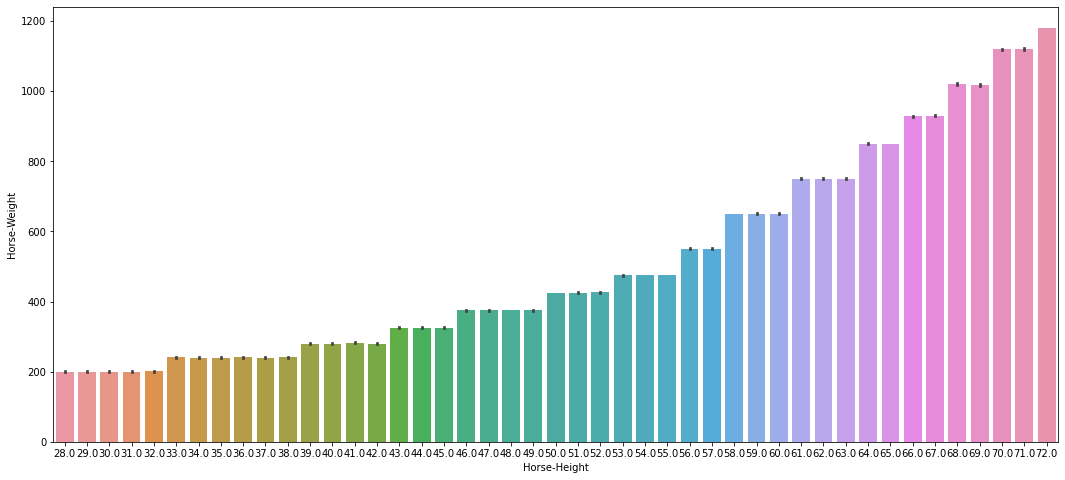

In [4]:
# visualise using barplot
plt.subplots(figsize=(18, 8))
sns.barplot(x='Horse-Height', y='Horse-Weight', data=hd)

<AxesSubplot:>

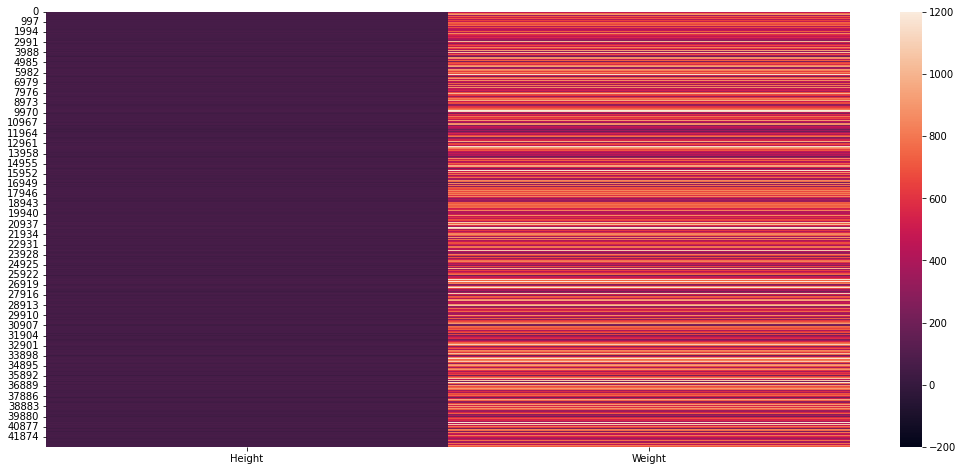

In [5]:
# visualizing the data using heatmap
plt.subplots(figsize=(18, 8))

# beacause there is are so many columns but we only want two column
heat_data = pd.DataFrame({
    'Height': hd['Horse-Height'],
    'Weight': hd['Horse-Weight']
})
sns.heatmap(data=heat_data, vmin=-200, vmax=1200)

In [6]:
# now splitting the dataset into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)

In [7]:
# fitting logistics regression to training dataset
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
# here we havce predicted the output
y_pred = model.predict(X_test)
y_pred

array([600., 700., 500., ..., 450., 800., 450.])

Text(0, 0.5, 'Horse Weight')

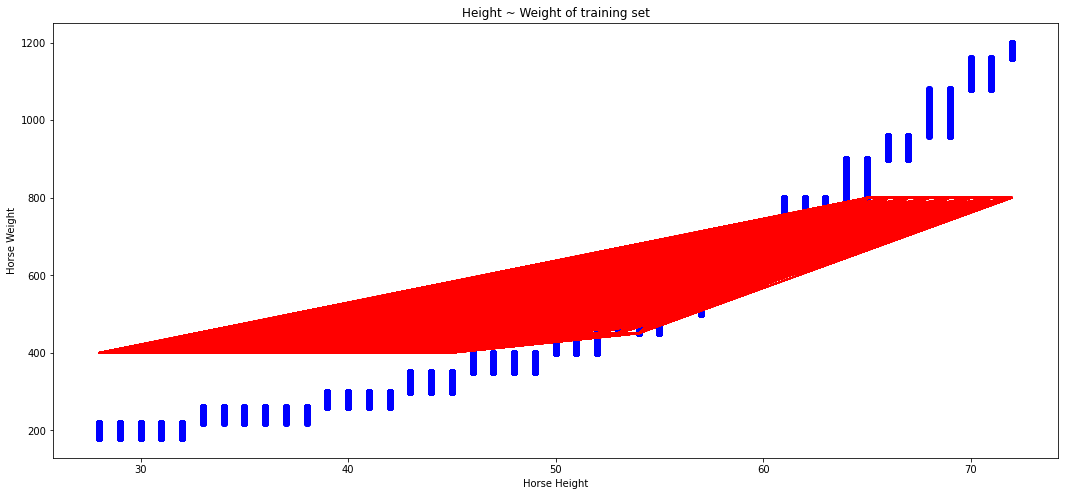

In [9]:
# now visulize the training set result
plt.subplots(figsize=(18, 8))
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, model.predict(X_train), color='red')
plt.title('Height ~ Weight of training set')
plt.xlabel('Horse Height')
plt.ylabel('Horse Weight')